In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

0     NaN
1     4.0
2    30.0
3    43.0
4    43.0
5    15.0
Name: Attractive Level, dtype: float64
Original Data : 


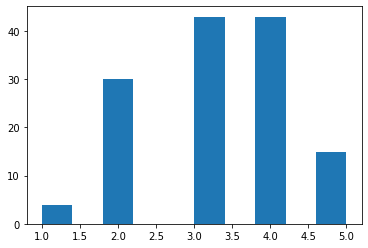

In [2]:
filename = 'Annotation.xlsx'
file = pd.read_excel(filename)
print(file.apply(pd.Series.value_counts)['Attractive Level'].head(6))
print("Original Data : ")
plt.figure()
plt.hist(file["Attractive Level"])
plt.show()


In [3]:
#Data Analysis
vars = ["Sound", "Music", "Noise control", "Speaking Style", "Camera", "Stable", "Angel diversity", "Images", "Resolution", "Color", "Content", "Introduction", "Food description", "Reviewer", "Reviewer emotion", "Recommendation", "Clear information"]

def corr(data, X, Y):
  plt.figure()
  print(X +  " and "+ Y)
  for x in set(data[X]):
    y = data[ data[X] == x][Y].mean()
    plt.plot(x, y, 'ro')
  plt.show()

#for x in vars:
#    corr(file, "Attractive Level", x)

In [4]:
#selected data
vars = ["Sound", "Music", "Noise control", "Speaking Style", "Camera", "Stable", "Angel diversity", "Images", "Color", "Content", "Introduction", "Food description", "Reviewer", "Reviewer emotion", "Recommendation", "Clear information"]

In [5]:
#Solve imbalance data
def smote(file, vars: list):
    data1 = file[file['Attractive Level']==1]
    file = data = pd.concat([file, data1],axis=0)
    X = file[vars]
    Y = file['Attractive Level']
    oversample = SMOTE(random_state=42)
    X, Y = oversample.fit_resample(X, Y)
    data = pd.concat([X, Y],axis=1)
    data_train, data_test= train_test_split(data, test_size = 0.2, shuffle=True)
    X_train = data_train[vars]
    Y_train = data_train['Attractive Level']
    X_test = data_test[vars]
    Y_test = data_test['Attractive Level']
    return X_train, Y_train, X_test, Y_test

linear Regresstion

In [6]:
#linear Regresstion
def linearRegression(X_train, Y_train, X_test, Y_test):
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    #print(lr.coef_)

    prediction_test = lr.predict(X_test)
    prediction_train = lr.predict(X_train)
    print(np.array(Y_test))
    print(prediction_test)
    from sklearn.metrics import f1_score

    print('R_quare (train):', r2_score(Y_train, prediction_train))
    print('R_quare (test):', r2_score(Y_test, prediction_test))
    print('F1 score (train):', f1_score(prediction_train.round(), Y_train.round(), average='macro'))
    print('F1 score (test):', f1_score(prediction_test.round(), Y_test.round(), average='macro'))
    #print('MSE:', mean_squared_error(Y_test, prediction))

    def checkAcc(Y, prediction):
      count = 0
      Y = np.array(Y)
      for i, rs in enumerate(list(prediction)):
        if rs.round() == Y[i]:
          count = count +1
      return count/len(Y)
    print("Accuracy (train): "+ str(checkAcc(Y_train, prediction_train)))
    print("Accuracy (test): "+ str(checkAcc(Y_test, prediction_test)))

# Original Data
file = pd.read_excel(filename)
data_train, data_test= train_test_split(file, test_size = 0.2, shuffle=True)
X = data_train[vars]
Y = data_train['Attractive Level']
X_test = data_test[vars]
Y_test = data_test['Attractive Level']
print("Original Data")
linearRegression(X, Y, X_test, Y_test)

# SMOTE
file = pd.read_excel(filename)
X_train, Y_train, X_test, Y_test = smote(file, vars)
print("SMOTE")
linearRegression(X_train, Y_train, X_test, Y_test)

Original Data
[2 3 4 3 4 2 4 2 4 3 3 1 4 2 4 2 5 3 3 5 3 2 2 5 5 2 4]
[2.40887439 1.56672187 4.29979985 2.96796836 4.03962205 1.731328
 4.33550792 2.73882976 4.02123263 2.0023589  3.29816546 2.43782031
 3.32080682 3.17394781 3.65328759 3.0440579  5.01088772 2.68953491
 2.97987363 4.83080871 3.6111167  2.28007715 2.55910301 5.00321652
 4.85679515 2.94193716 3.59237139]
R_quare (train): 0.8358053077380801
R_quare (test): 0.6710044945334541
F1 score (train): 0.7973761140819965
F1 score (test): 0.5512605042016807
Accuracy (train): 0.7962962962962963
Accuracy (test): 0.6296296296296297
SMOTE
[4 1 3 3 3 3 1 3 1 2 4 3 2 5 5 2 3 1 5 3 5 3 2 4 4 1 2 4 4 3 5 2 4 5 4 1 2
 5 5 5 3 2 5]
[2.91997304 1.49062212 2.84947752 1.79784186 3.02439117 2.72787088
 1.2571251  2.65962418 1.28909603 2.35939136 3.30519064 3.00734477
 2.01444425 5.04303822 5.04303822 1.36014922 2.65895294 1.28909603
 4.70126996 3.06096386 5.12739372 2.72170569 1.84457361 4.01853762
 5.10683001 1.15403616 2.45168579 4.00780196 3.63

Logistic Regression

In [7]:
#Logistic Regression

dataLgR = pd.read_excel(filename)
#transform data
for i, y in enumerate(dataLgR["Attractive Level"]):
    if y == 1 or y ==2:
      dataLgR["Attractive Level"][i] = 0
    else:
      dataLgR["Attractive Level"][i] = 1

def logisticRegression(X, Y, X_test, Y_test):
  lg = LogisticRegression()
  lg.fit(X, Y)

  prediction = lg.predict(X_test)
  print(np.array(Y_test))
  print(prediction)

  print("Score (train): "+ str(lg.score(X,Y )))
  print("Score (test): "+ str(lg.score(X_test, Y_test)))

data_train, data_test= train_test_split(dataLgR, test_size = 0.2, shuffle=False)
X = data_train[vars]
Y = data_train['Attractive Level']
X_test = data_test[vars]
Y_test = data_test['Attractive Level']
print("Original Data")
logisticRegression(X, Y, X_test, Y_test)

X, Y, X_test, Y_test = smote(dataLgR, vars)
print("SMOTE")
logisticRegression(X, Y, X_test, Y_test)

Original Data
[1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1]
[1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1]
Score (train): 0.8703703703703703
Score (test): 0.8518518518518519
SMOTE
[1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1
 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 1 0 0]
[1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1
 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 1 0 0]
Score (train): 0.9504643962848297
Score (test): 0.9382716049382716


C:\Users\Maxsys\AppData\Local\Temp\ipykernel_18212\2625610487.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataLgR["Attractive Level"][i] = 1
C:\Users\Maxsys\AppData\Local\Temp\ipykernel_18212\2625610487.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataLgR["Attractive Level"][i] = 0


Classification (using support vector machine)

In [8]:
#SVM
def SVM(X, Y, X_test, Y_test):
  svm = SVR(kernel = 'rbf')
  svm.fit(X,Y)
  print("Score (train): "+ str(svm.score(X,Y )))
  print("Score (test): "+ str(svm.score(X_test, Y_test)))

file = pd.read_excel(filename)
data_train, data_test= train_test_split(file, test_size = 0.2, shuffle=False)
X = data_train[vars]
Y = data_train['Attractive Level']
X_test = data_test[vars]
Y_test = data_test['Attractive Level']
print("Original Data")
SVM(X, Y, X_test, Y_test)
print('SMOTE')
X, Y, X_test, Y_test = smote(file, vars)
SVM(X, Y, X_test, Y_test)

Original Data
Score (train): 0.8355509158232041
Score (test): 0.7636327653268341
SMOTE
Score (train): 0.9187881734613834
Score (test): 0.9556478237654589


k Mean

<AxesSubplot:>

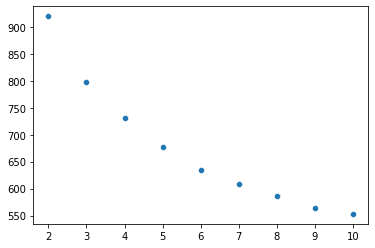

In [9]:
Data = pd.read_excel('Annotation.xlsx')
varData = ["Sound", "Music", "Noise control", "Speaking Style", "Camera", "Stable", "Angel diversity", "Images", "Resolution", "Color", "Content", "Food description", "Reviewer", "Reviewer emotion", "Recommendation", "Clear information"]

Cl_data = Data[varData]
#elbow method
K = range(2, 11)
wss = []
for k  in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(Cl_data)
    wss_iter =kmeans.inertia_
    wss.append(wss_iter)
sns.scatterplot(x=K, y=wss)

In [10]:
Cl_data = Data[['Sound', 'Camera', 'Images', 'Reviewer']]   
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(Cl_data)
Cl_data["Attractive Level"] = Data[['Attractive Level']]
Cl_data["clusters"] = kmeans.labels_
Cl_data.groupby('clusters').agg(
{
    "Attractive Level": "mean",
    "Sound" : 'mean', 
    "Camera"  : 'mean',  
    "Images"  : 'mean', 
    "Reviewer" : 'mean' 
}
).round()

C:\Users\Maxsys\AppData\Local\Temp\ipykernel_18212\3493126882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cl_data["Attractive Level"] = Data[['Attractive Level']]
C:\Users\Maxsys\AppData\Local\Temp\ipykernel_18212\3493126882.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cl_data["clusters"] = kmeans.labels_


,Attractive Level,Sound,Camera,Images,Reviewer
clusters,,,,,
0,5.0,5.0,5.0,5.0,5.0
1,3.0,3.0,3.0,3.0,3.0
2,4.0,4.0,4.0,4.0,4.0
3,2.0,3.0,3.0,3.0,2.0
